<a href="https://colab.research.google.com/github/David9203/Clustering-Validity-Methods-sessions/blob/main/ClusterValidity_and_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taken from :

Introduction to Data Mining, 2nd Edition 4 Tan, Steinbach, Karpatne, Kumar

Mayur R. Machhi,  for The Sparks Foundation
https://github.com/mayursrt/k-means-on-iris-dataset



# Cluster Analysis
Given a set of objects, place them in groups such that the objects in a group are similar (or related) to one another and different from (or unrelated to) the objects in other groups




Notion of a Cluster can be Ambiguous
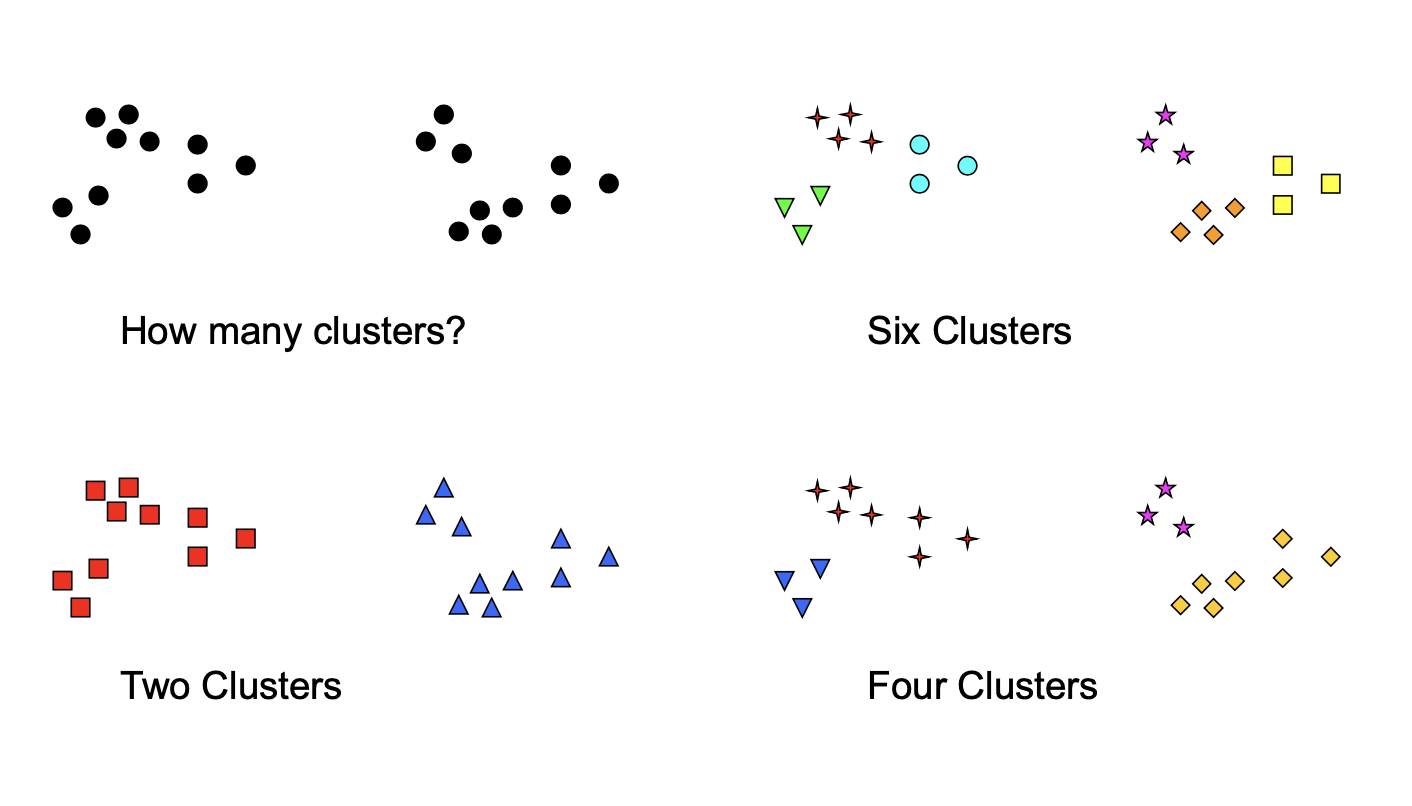

# Overview of clustering methods
A comparison of the clustering algorithms in scikit-learn

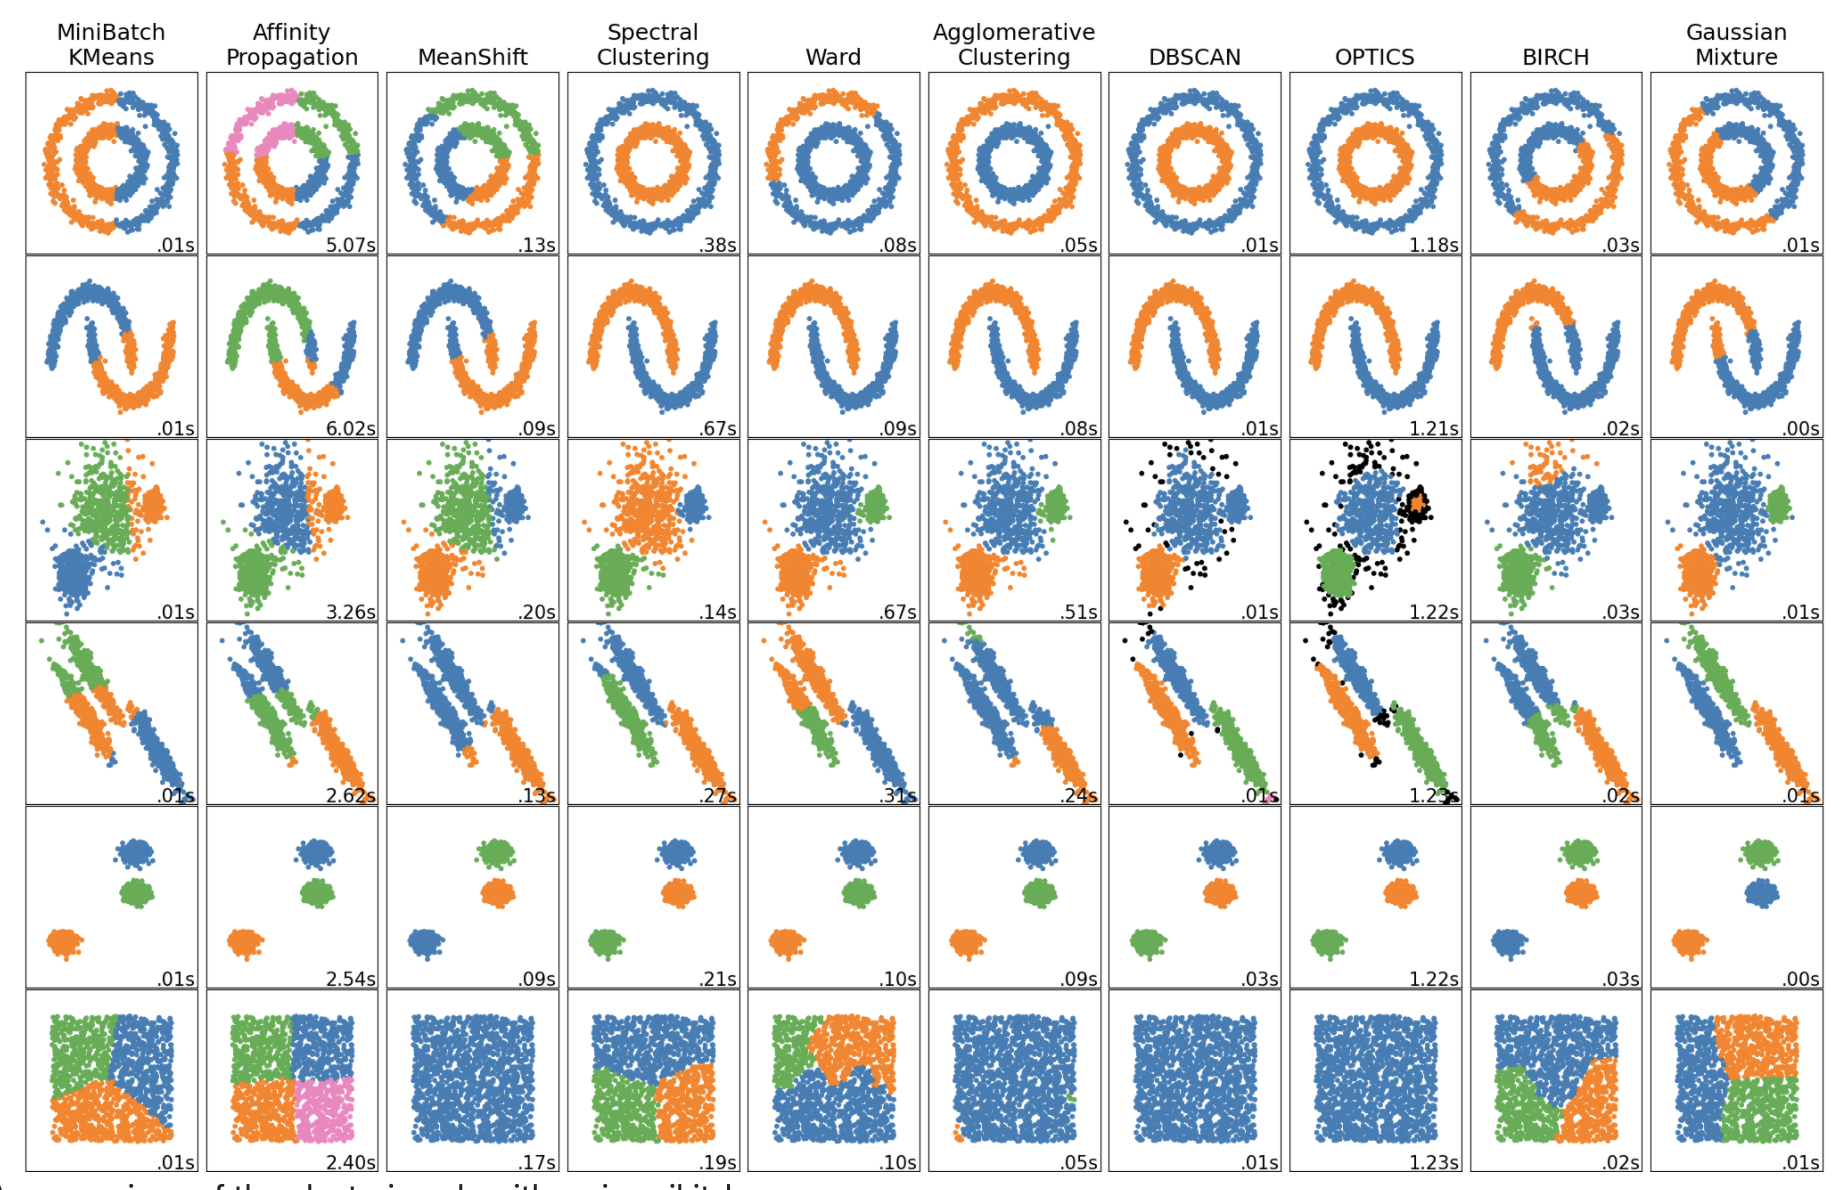





Two different K-means Clusterings
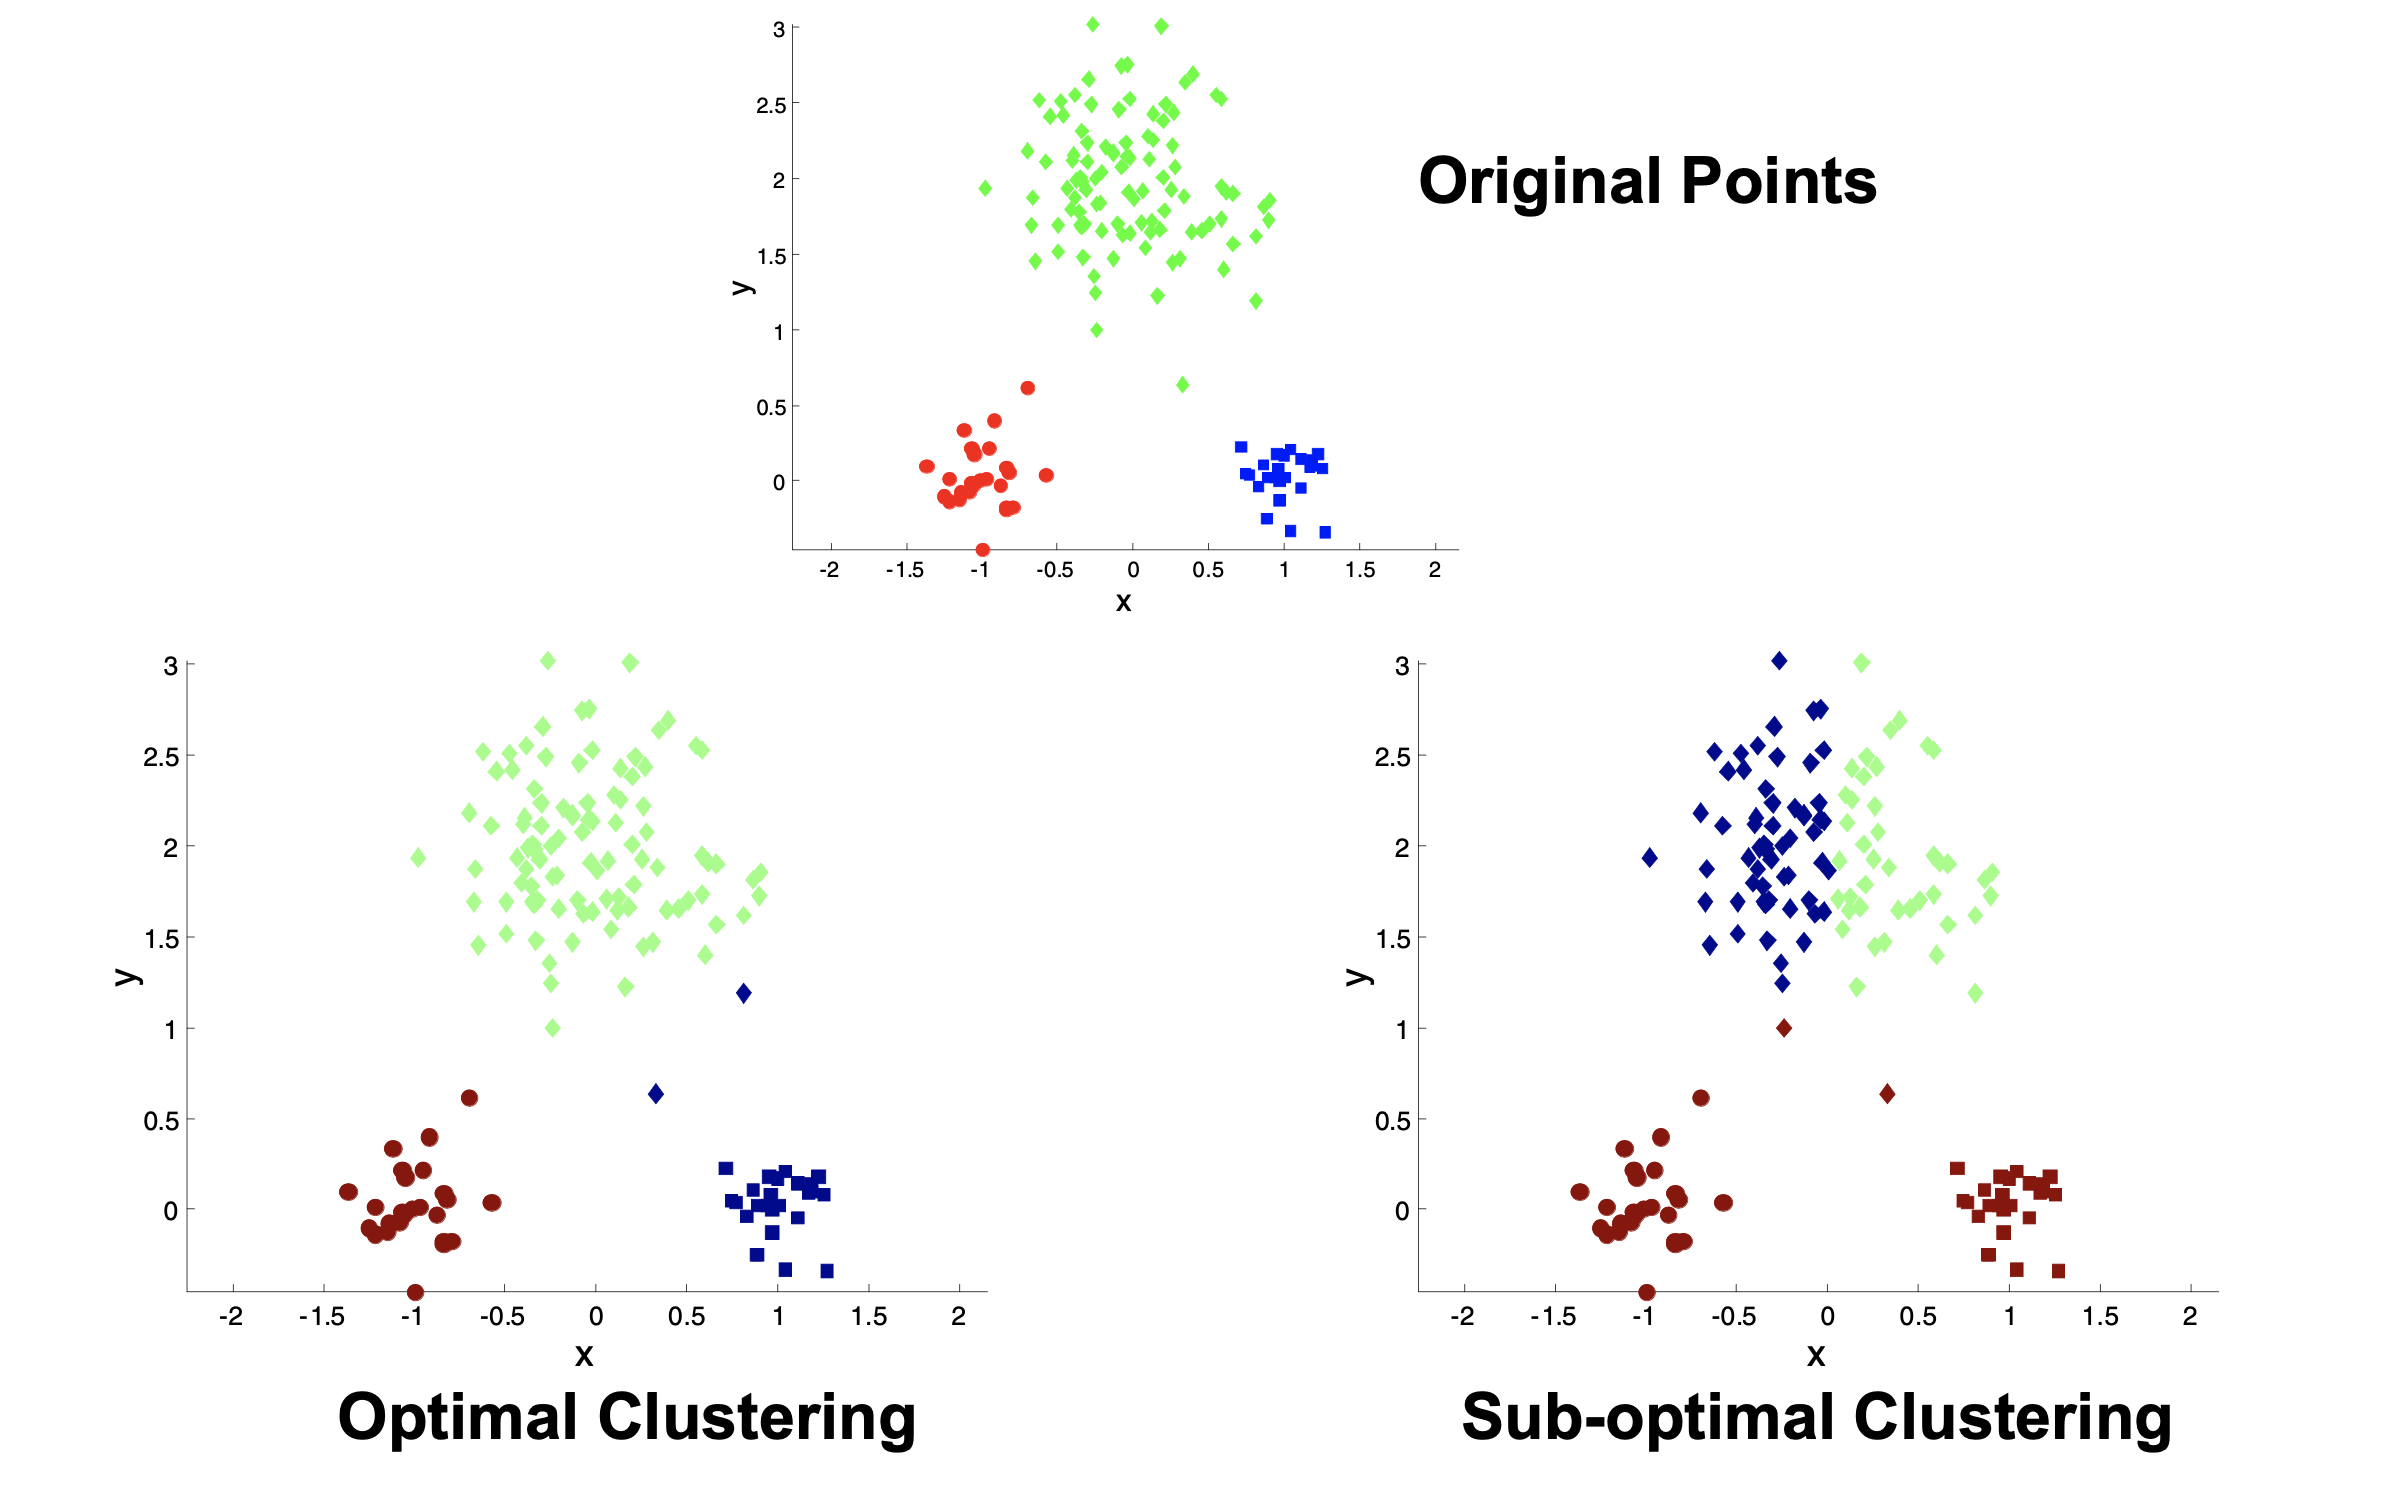


Differing Density
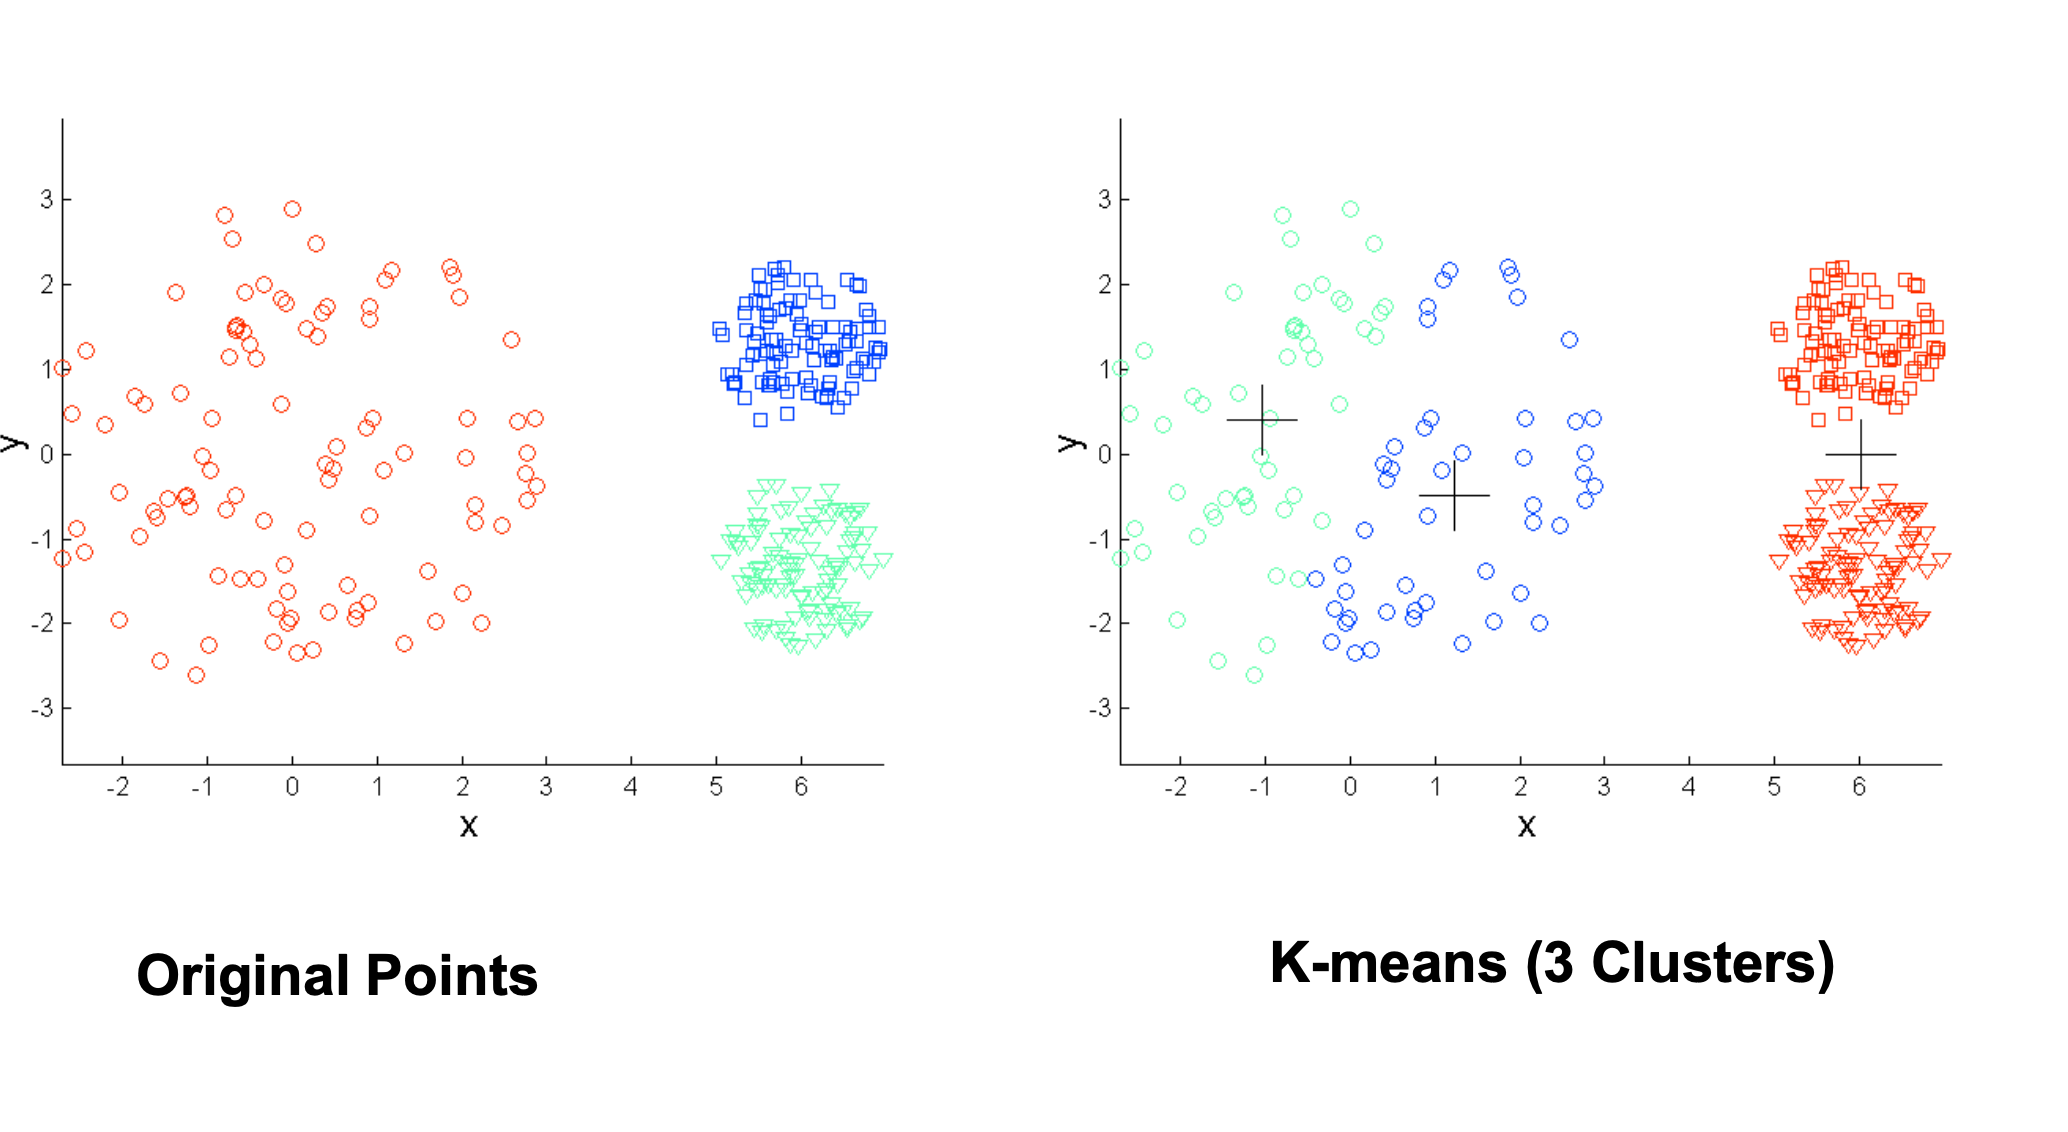



Kmeans Limitation :Non-globular Shapes

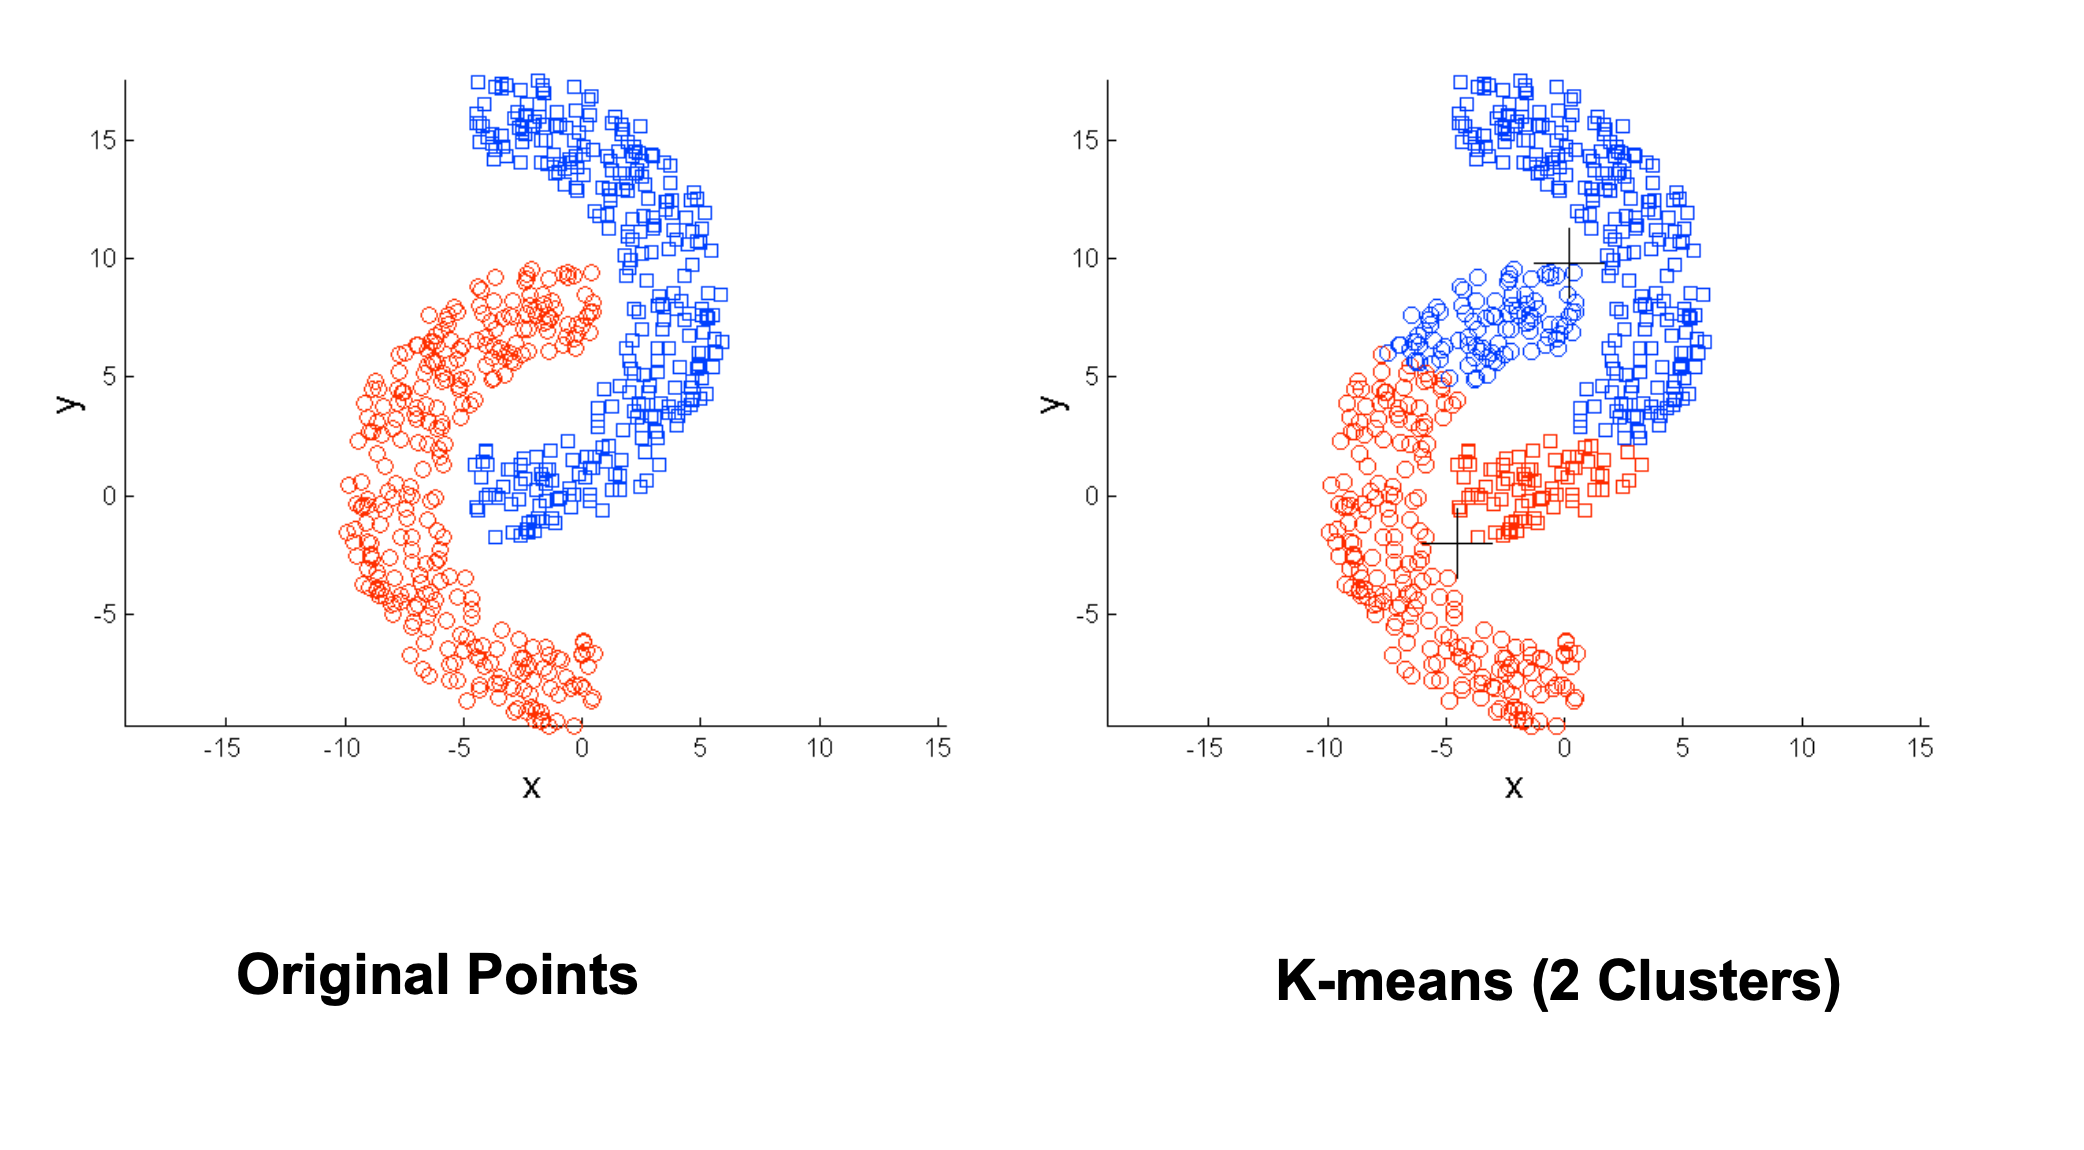

# Cluster Validation 

For supervised classification we have a variety of measures to evaluate how good our model is

  * Accuracy, precision, recall
  
For cluster analysis, the analogous question is how to
evaluate the “goodness” of the resulting clusters?  But “clusters are in the eye of the beholder”!


 In practice the clusters we find are defined by the clustering algorithm
 Then why do we want to evaluate them?
* To avoid finding patterns in noise
* To compare clustering algorithms
* To compare two sets of clusters
* To compare two clusters


## Measures of Cluster Validity
Numerical measures that are applied to judge various aspects of cluster validity, are classified into the following two types.

 **External___Supervised**

Used to measure the extent to which cluster labels match externally supplied class labels.

 * Entropy

 * Often called external indices because they use information external to the data

**Internal___Unsupervised** 

Used to measure the goodness of a clustering structure without respect to external information.

* Sum of Squared Error (SSE)

* Often called internal indices because they only use information in the data



# PAIRWISE

# External 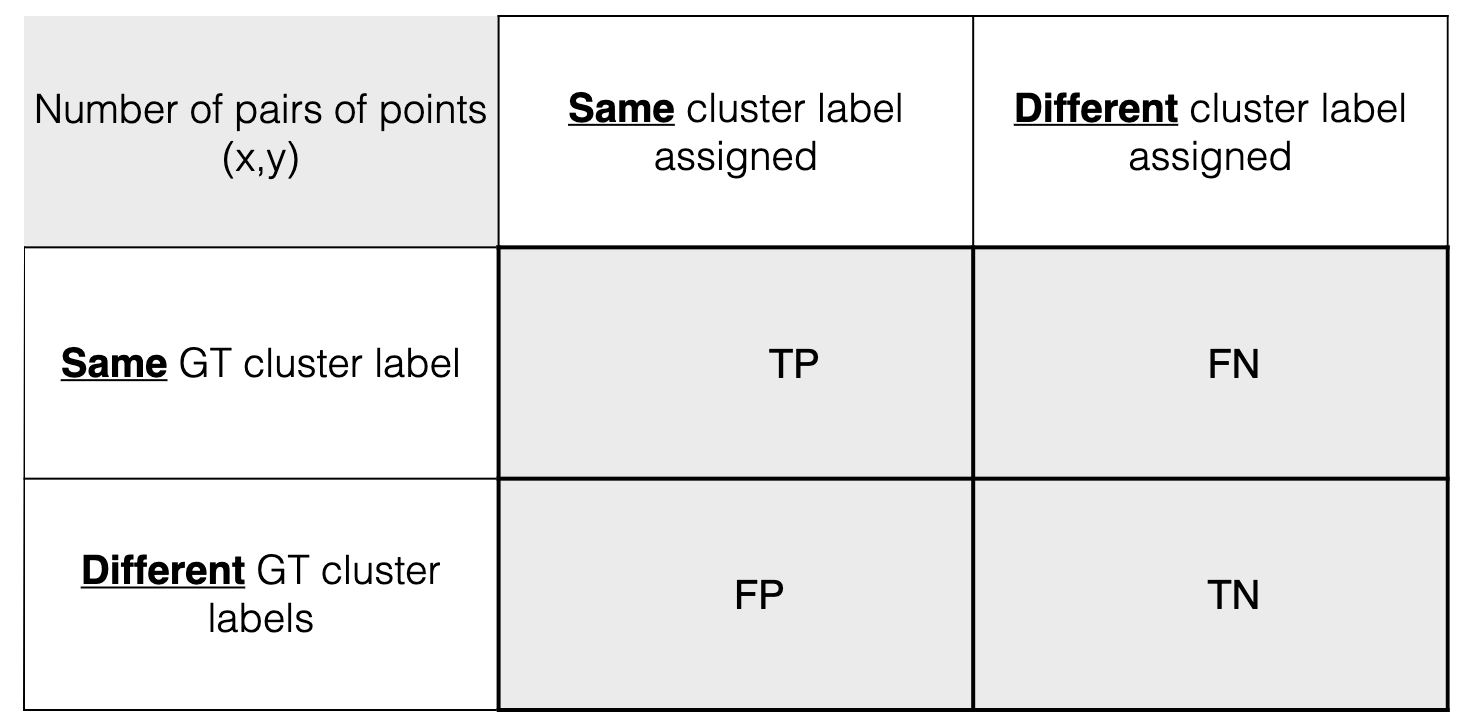

# Unsupervised Measures: Cohesion and Separation
* Cluster Cohesion: Measures how closely related are objects in a cluster Example: sum of squares (SSE)
* Cluster Separation: Measure how distinct or well-
separated a cluster is from other clusters



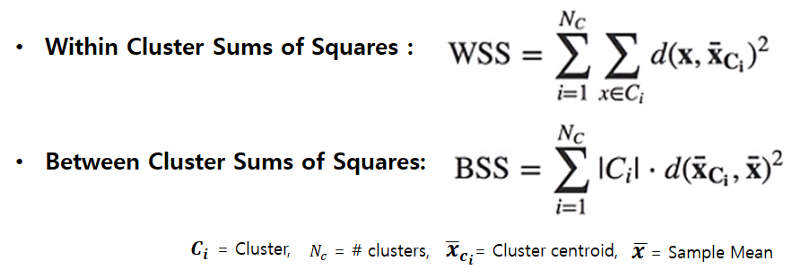





# Cluster validity indices in Iris Dataset

El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936, The use of multiple measurements in taxonomic problems (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de análisis discriminante lineal.1​ A veces, se llama Iris conjunto de datos de Anderson porque Edgar Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies relacionadas.2​ Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona con el mismo aparato».3​

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

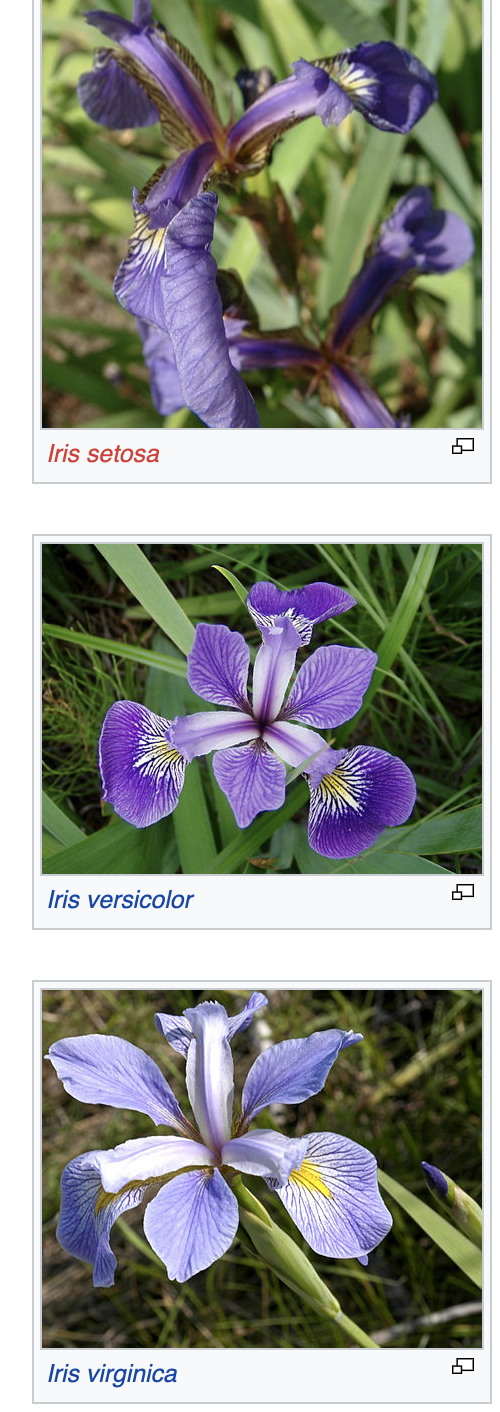

In [ ]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
data

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]

In [ ]:
data.describe()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

Check the if there are null data

In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
data['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [ ]:
target_data = data.iloc[:,4]
target_data.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

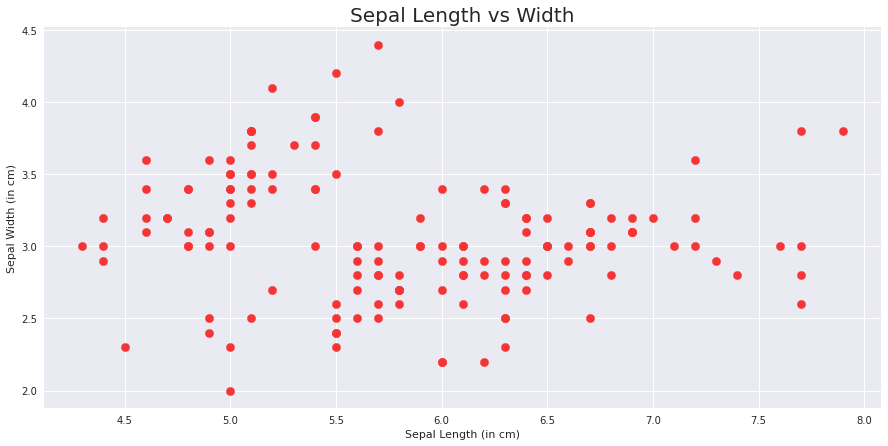

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['sepal length (cm)'],y=data['sepal width (cm)'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

# DETERMINED No Clusters 

**within-cluster sum of square (WSS)**


Recall that, the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

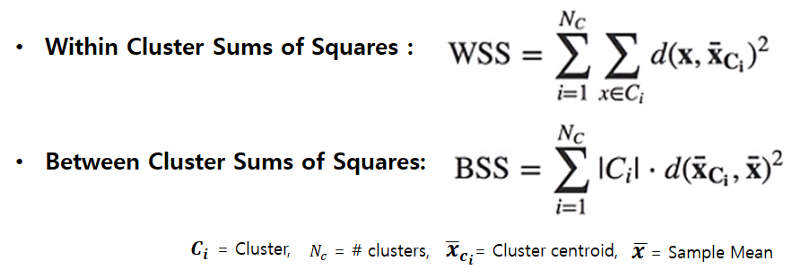

WSS as a function of the  clusters number: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

The optimal number of clusters can be defined as follow:

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within-cluster sum of square (wss).
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.




In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_) #inertia_float Sum of squared distances of samples to their closest cluster center.
np.array(wcss)

array([681.3706    , 152.34795176,  78.85144143,  57.22847321,
        46.44618205,  39.03998725,  34.29971212,  30.18507274,
        28.10244118,  25.84946448])

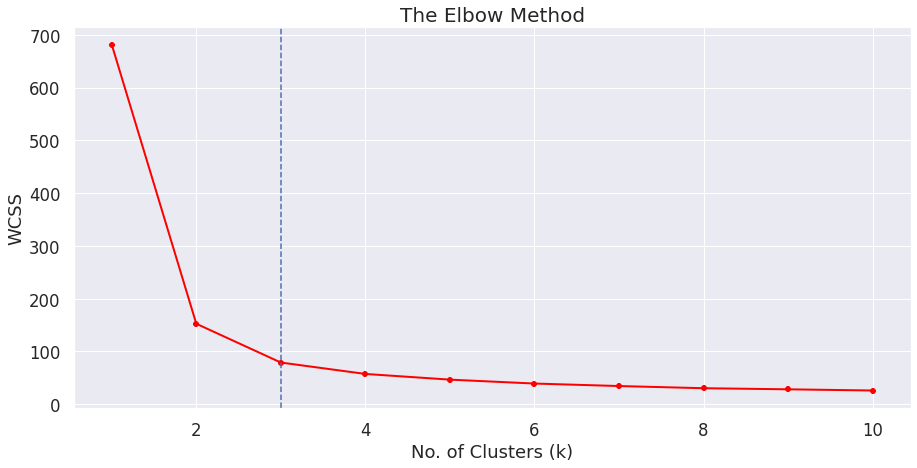

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now that we have the clusters created, we will enter them into a different column

In [ ]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Cluster_Prediction
0                5.1               3.5  ...               0.2                   1
1                4.9               3.0  ...               0.2                   1
2                4.7               3.2  ...               0.2                   1
3                4.6               3.1  ...               0.2                   1
4                5.0               3.6  ...               0.2                   1

[5 rows x 5 columns]

We can also get the centroids of the clusters by the `cluster_centers_` attribute of KMeans algorithm.

In [ ]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.

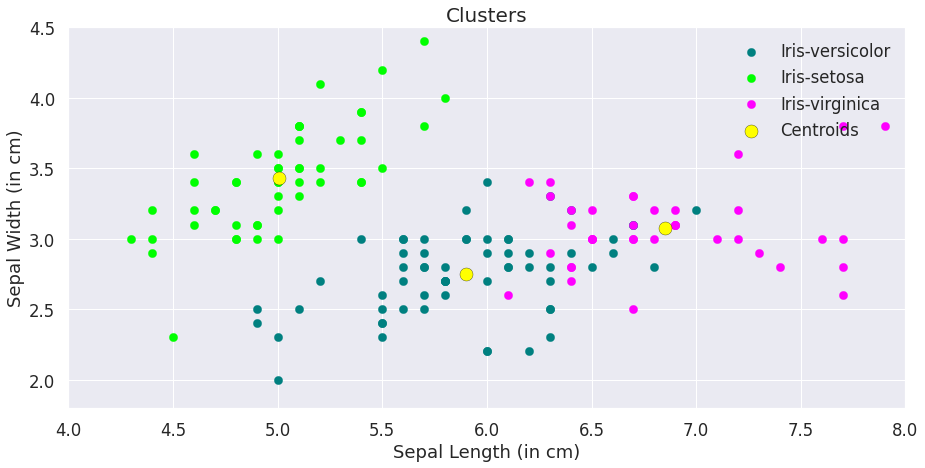

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal width (cm)'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal width (cm)'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal width (cm)'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

### Analysis

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the 
data.
Kmeans has divided the dataset into 3 clusters based on Annual income and the spending scores of the individual customers.
The following clusters are created by the model, 
1. Iris-versicolor
1. Iris-setosa
1. Iris-virginica

#### 1. Iris-versicolor

![versicolor](images/versicolor.jpg)
Iris versicolor is a flowering herbaceous perennial plant, growing 10–80 cm (4–31 in) high. It tends to form large clumps from thick, creeping rhizomes. The unwinged, erect stems generally have basal leaves that are more than 1 cm (1⁄2 in) wide. Leaves are folded on the midribs so that they form an overlapping flat fan. The well developed blue flower has 6 petals and sepals spread out nearly flat and have two forms. The longer sepals are hairless and have a greenish-yellow blotch at their base. The inferior ovary is bluntly angled. Flowers are usually light to deep blue (purple and violet are not uncommon) and bloom during May to July. Fruit is a 3-celled, bluntly angled capsule. The large seeds can be observed floating in fall.

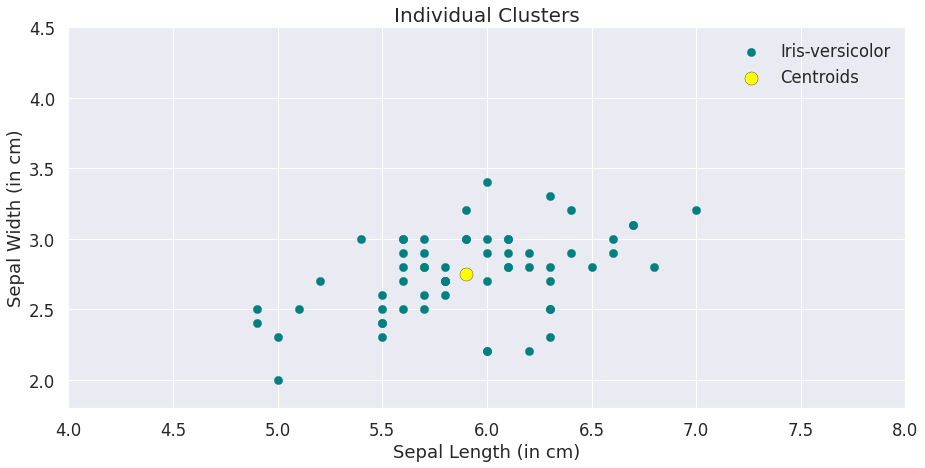

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal width (cm)'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[0, 0], y=kms.cluster_centers_[0, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()

#### 2. Iris-setosa


Iris setosa is similar in form to a miniature Japanese iris, or a dwarf version of Iris sibirica but a shorter lived version.
The shallowly rooted, large, branching rhizomes spread over time to create large clumps. The rhizomes are grey-brown, thick, and are covered with old (maroon-brown) fibrous leaf remains (of last seasons leaves).
It has branched stems, which are very variable in height, ranging from 10 cm (5 inches) up to 1 m (3 ft) tall. The larger plants can grow beyond the height of the leaves. The roundish stems are between 1.5–9 cm in diameter with 1 to 3 branches.
Iris setosa has mid-green leaves, which are grass-like, and lanceolate (sword-shaped). They have a purplish tinged base and the leaves can measure 30–60 cm (12–24 in) long by 0.8–2.5 cm wide.
The plant has 3–4 flowers per stem (between 6 and 13 for the whole plant, in groups of 3,) and it blooms between June and July.
The large flowers are between 5–8 cm (3–6 in) across, usually 7–8 cm, and come in a range of shades of blue, which can depend on the location. and range from violet, purple-blue, violet-blue, blue, to lavender. Very occasionally, there are pink or white forms.

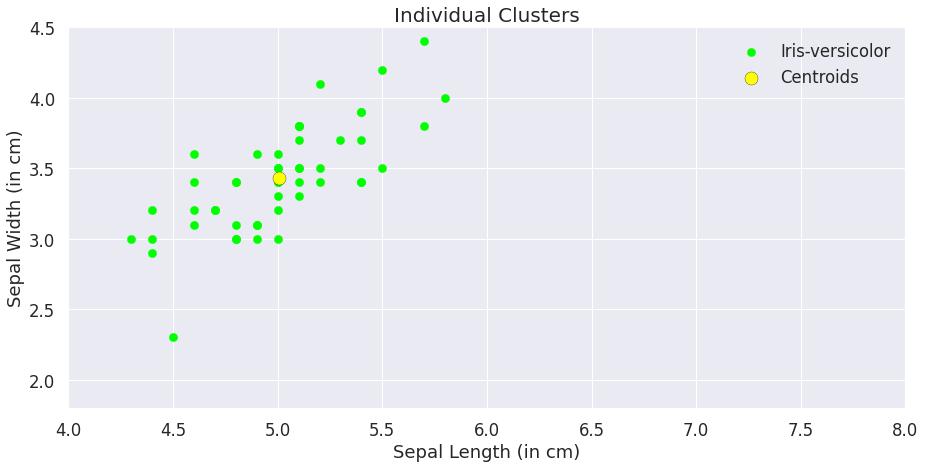

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal width (cm)'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[1, 0], y=kms.cluster_centers_[1, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()

#### 3. Iris-virginica

Iris virginica is a perennial plant. The plant has 2 to 4 erect or arching, bright green, lance-shaped leaves that are flattened into one plane at the base. Leaves are 1–3 cm (1⁄2–1 1⁄4 in) wide and are sometimes longer than the flower stalk. The fleshy roots (1–2 cm or 1⁄2–3⁄4 in in diameter) are rhizomes that spread underground. Pale brown, variably shaped seeds are born in three-part fruit capsules (3–6 cm or 1 1⁄4–2 1⁄4 in long, 1–2 cm or 1⁄2–3⁄4 in wide).
The slightly fragrant flowers (4 cm or 1 1⁄2 in long, 7 cm or 2 3⁄4 in across) consist of 3 horizontal sepals, or "falls", and 3 erect petals. The petals and sepals can vary in color from dark-violet to pinkish-white. The sepals have a splash of yellow to yellow-orange at the crest. Each plant has 2 to 6 flowers that bloom from April to May upon a single, erect, 30–90 cm (12–35 in) tall stalk. The stalk is sometimes branched and has a slight zigzag appearance.

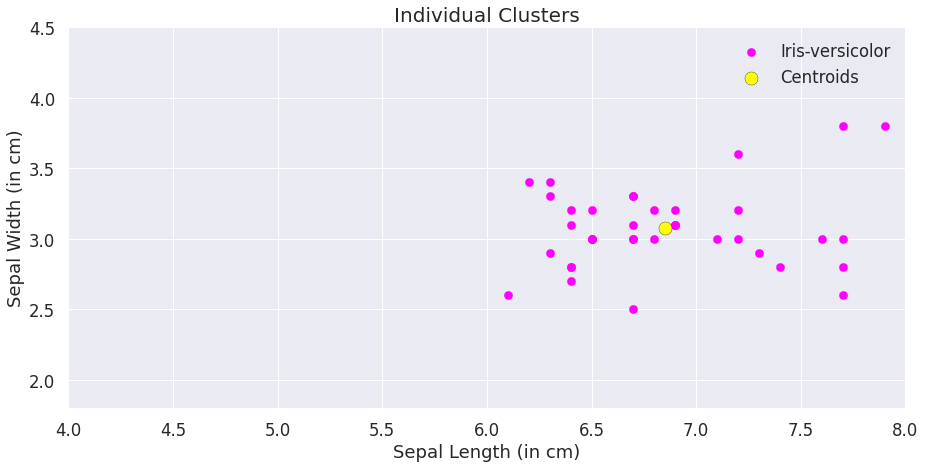

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal width (cm)'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[2, 0], y=kms.cluster_centers_[2, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()

# Other Validity indices

#Silhouette Coefficient 

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
for i in range(2,10):
  kmeans_model = KMeans(n_clusters=i, random_state=1).fit(clustering_data)
  labels = kmeans_model.labels_
  print('no index:',i)
  print('Silhouette :',metrics.silhouette_score(clustering_data, labels, metric='euclidean'))

no index: 2
Silhouette : 0.681046169211746
no index: 3
Silhouette : 0.5528190123564091
no index: 4
Silhouette : 0.4980505049972867
no index: 5
Silhouette : 0.49308040671935127
no index: 6
Silhouette : 0.3648340039670018
no index: 7
Silhouette : 0.35439644785886376
no index: 8
Silhouette : 0.35974549238457515
no index: 9
Silhouette : 0.35691819487017074


The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

# Calinski-Harabasz Index

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [ ]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
for i in range(2,10):
  kmeans_model = KMeans(n_clusters=i, random_state=1).fit(clustering_data)
  labels = kmeans_model.labels_
  print('no index:',i)
  print('Calinski-Harabasz:', metrics.calinski_harabasz_score(clustering_data, labels))

no index: 2
Silhouette : 513.9245459802768
no index: 3
Silhouette : 561.62775662962
no index: 4
Silhouette : 530.7658081872851
no index: 5
Silhouette : 495.24341371472735
no index: 6
Silhouette : 473.8506068330425
no index: 7
Silhouette : 447.94303986000114
no index: 8
Silhouette : 439.46071502572073
no index: 9
Silhouette : 406.0177035143984


El mejor caso es 3 para este indice.

# davies_bouldin_score

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
  kmeans_model = KMeans(n_clusters=i, random_state=1).fit(clustering_data)
  labels = kmeans_model.labels_
  print('no index:',i)
  print('indx:', davies_bouldin_score(clustering_data, labels))

no index: 2
indx: 0.40429283717304365
no index: 3
indx: 0.6619715465007511
no index: 4
indx: 0.7803069838811096
no index: 5
indx: 0.819384494835044
no index: 6
indx: 0.9141579726538059
no index: 7
indx: 0.967160362677773
no index: 8
indx: 0.9265757010427397
no index: 9
indx: 0.9597515621081598


Low indice

Drawbacks
The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

The usage of centroid distance limits the distance metric to Euclidean space.

# SKLEARN 

In [1]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
data

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]

In [13]:
data.describe()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

In [16]:
iris_df=data.rename(columns={"target": "species"}, errors="raise")

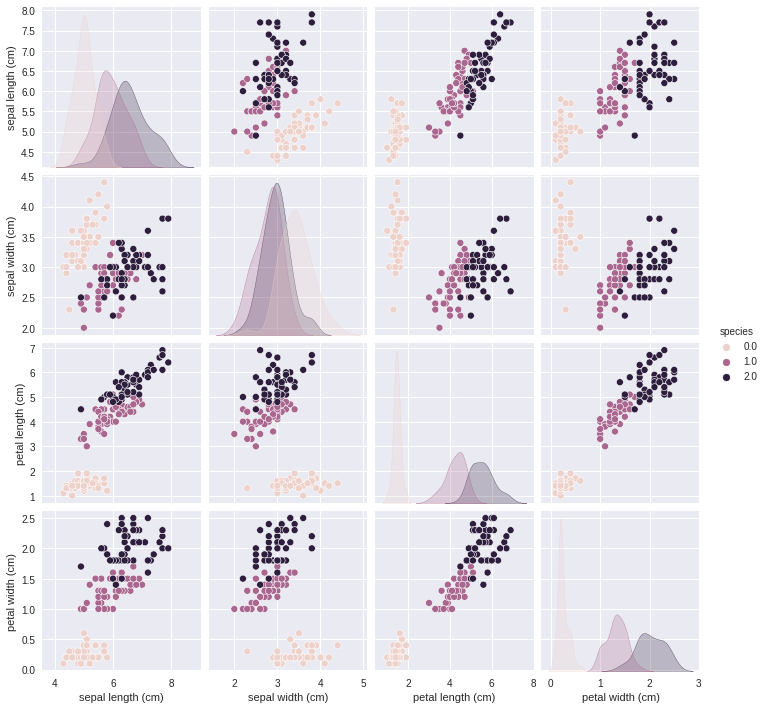

In [17]:
sns.pairplot(iris_df, hue= 'species')

In [18]:
# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)


In [19]:
# Variables
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']


In [21]:
from sklearn.model_selection import train_test_split# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)



In [23]:
# Instantiating LinearRegression() Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()



In [24]:
# Training/Fitting the Model
lr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)



In [27]:
# Evaluating Model's Performance

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.2595570975563036
Mean Squared Error: 0.10174529564238954
Mean Root Squared Error: 0.3189753840696638


In [28]:
iris_df.loc[6]

sepal length (cm)    4.6
sepal width (cm)     3.4
petal length (cm)    1.4
petal width (cm)     0.3
species              0.0
Name: 6, dtype: float64

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4                5.0               3.6                1.4               0.2

In [65]:
pred = lr.predict(iris_df.iloc[5:6,:4])
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 5)

Predicted Sepal Length (cm): 7.258556087027857
Actual Sepal Length (cm): 4.6


# Metrics 

 **Standar scaler**

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s



In [71]:
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(iris_df), columns=iris_df.columns, index=iris_df.index)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]

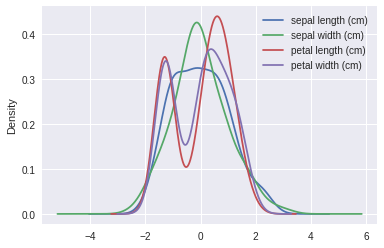

In [77]:
df.plot.density()

**Min max scaler**

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(iris_df), columns=iris_df.columns, index=iris_df.index)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.222222          0.625000           0.067797          0.041667
1             0.166667          0.416667           0.067797          0.041667
2             0.111111          0.500000           0.050847          0.041667
3             0.083333          0.458333           0.084746          0.041667
4             0.194444          0.666667           0.067797          0.041667
..                 ...               ...                ...               ...
145           0.666667          0.416667           0.711864          0.916667
146           0.555556          0.208333           0.677966          0.750000
147           0.611111          0.416667           0.711864          0.791667
148           0.527778          0.583333           0.745763          0.916667
149           0.444444          0.416667           0.694915          0.708333

[150 rows x 4 columns]

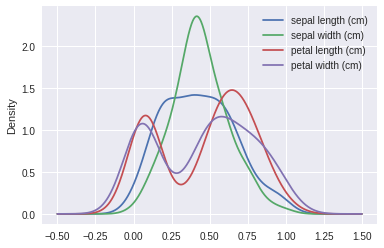

In [75]:
df.plot.density()

# PCA

https://scikit-learn.org/stable/modules/decomposition.html#decompositions

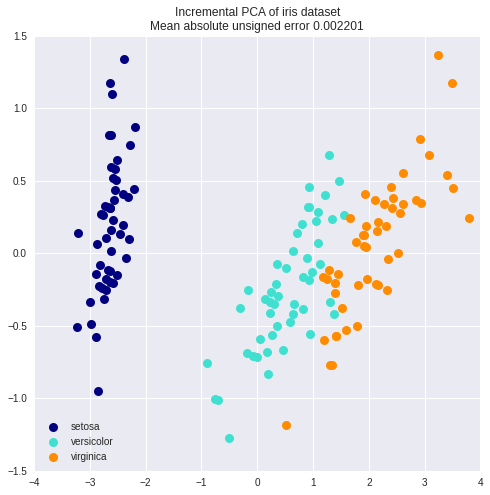

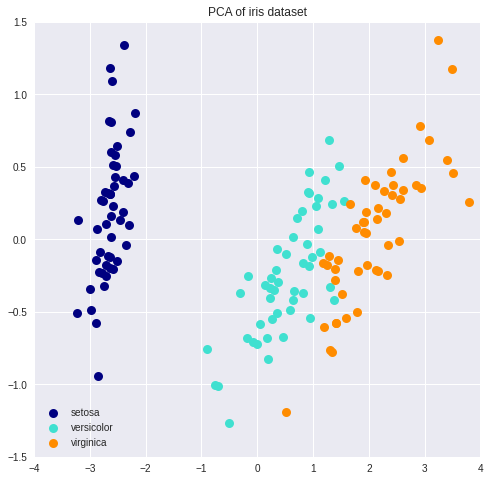

In [83]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

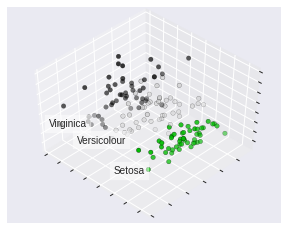

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)



fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Classification 

# **INTO THE REALM OF MACHINE LEARNING**

**Dividing the data for training and testing**

Once we have understood what the dataset is about, we can start training a model based on the algorithms. Here, we will be implementing some of the commonly used algorithms in machine learning. Let us start by training our model with some of the samples. We will be using an inbuilt library called ‘train_test_split’ which divides our data set into a ratio of 80:20. 

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [89]:


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Training the model**

Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing these algorithms to compare:

1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4] Decision Trees

5] Naive Bayes classifier

Let us start building our model and predicting accuracy of every algorithm used. We can also check which gives the best result.

We can start with the first algorithm **Logistic Regression**. We can build our model like below:

In [90]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]
accuracy is 1.0


Now , let us see the scores with **K-Nearest Neighbors** technique.

In [91]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      1.00      1.00        11
         2.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[ 6  0  0]
 [ 0 11  0]
 [ 1  0 12]]
accuracy is 0.9666666666666667


Thirdly , with **SVM (Support Vector Machines)**.

In [92]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]
accuracy is 1.0


Next , is my favorite , **decision trees** !

In [93]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]
accuracy is 1.0


And lastly , the **Naive Bayes classifier**. (Variants included)

In [94]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77         6
         1.0       1.00      1.00      1.00        11
         2.0       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.91      0.90      0.90        30

[[ 5  0  1]
 [ 0 11  0]
 [ 2  0 11]]
accuracy is 0.9


In [96]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.42      0.83      0.56         6
         1.0       0.92      1.00      0.96        11
         2.0       0.83      0.38      0.53        13

    accuracy                           0.70        30
   macro avg       0.72      0.74      0.68        30
weighted avg       0.78      0.70      0.69        30

[[ 5  0  1]
 [ 0 11  0]
 [ 7  1  5]]
accuracy is 0.7


In [100]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    BernoulliNB(),
              
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)


GaussianNB
****Results****
Accuracy: 90.0000%
BernoulliNB
****Results****
Accuracy: 70.0000%


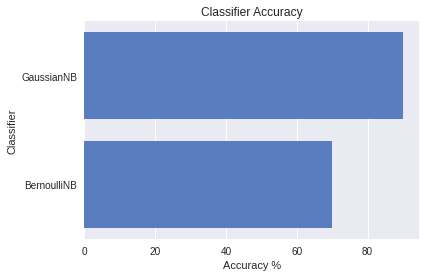

In [101]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()